Start by reading the data and create a data matrix x:

In [1]:
import numpy as np
iris_data = np.loadtxt("data/irisdata.txt", comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

Then check the data dimensions by writing:

In [2]:
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


We have 50 flowers and for each flower there are 4 measurements (features): sepal length, sepal width, petal length and petal width. 

To explore the data, we can create vectors of the individual feature:

In [3]:
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

Compute the variance of each feature like:

In [4]:
# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)

print(var_sep_l)
print(var_sep_w)
print(var_pet_l)
print(var_pet_w)

0.12424897959183677
0.1436897959183674
0.030159183673469384
0.01110612244897959


In statistics, ddof stands for "delta degrees of freedom". In the context of calculating variance, ddof is an optional parameter that represents the "degrees of freedom" correction to apply to the calculation.

When calculating sample variance, we typically use Bessel's correction to adjust for the fact that the sample mean is being used to estimate the population mean. Bessel's correction adjusts the degrees of freedom by subtracting 1 from the total number of observations, hence ddof is often set to 1 in sample variance calculations. This adjustment helps to provide an unbiased estimate of the population variance.

In [16]:
N = len(sep_l)

covariance = (1 / (N - 1)) * np.dot(sep_l, sep_w)

print("Covariance between sepal length and sepal width:", covariance)

covariance = (1 / (N - 1)) * np.dot(sep_l, pet_w)

print("Covariance between sepal length and petal width:", covariance)


Covariance between sepal length and sepal width: 17.61
Covariance between sepal length and petal width: 1.266938775510204


As with image analysis, it is very useful to get a graphical understanding of the data and what structures are hidden in the them. For this, we will use the seaborn Python package that also used the pandas package. Take a look at Appendix A, at the end of the document, for installation instructions.

Import seaborn and pandas:

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


c:\Users\Leuro\anaconda3\envs\Image_Analysis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leuro\anaconda3\envs\Image_Analysis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leuro\anaconda3\envs\Image_Analysis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leuro\anaconda3\envs\Image_Analysis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

<Figure size 640x480 with 0 Axes>

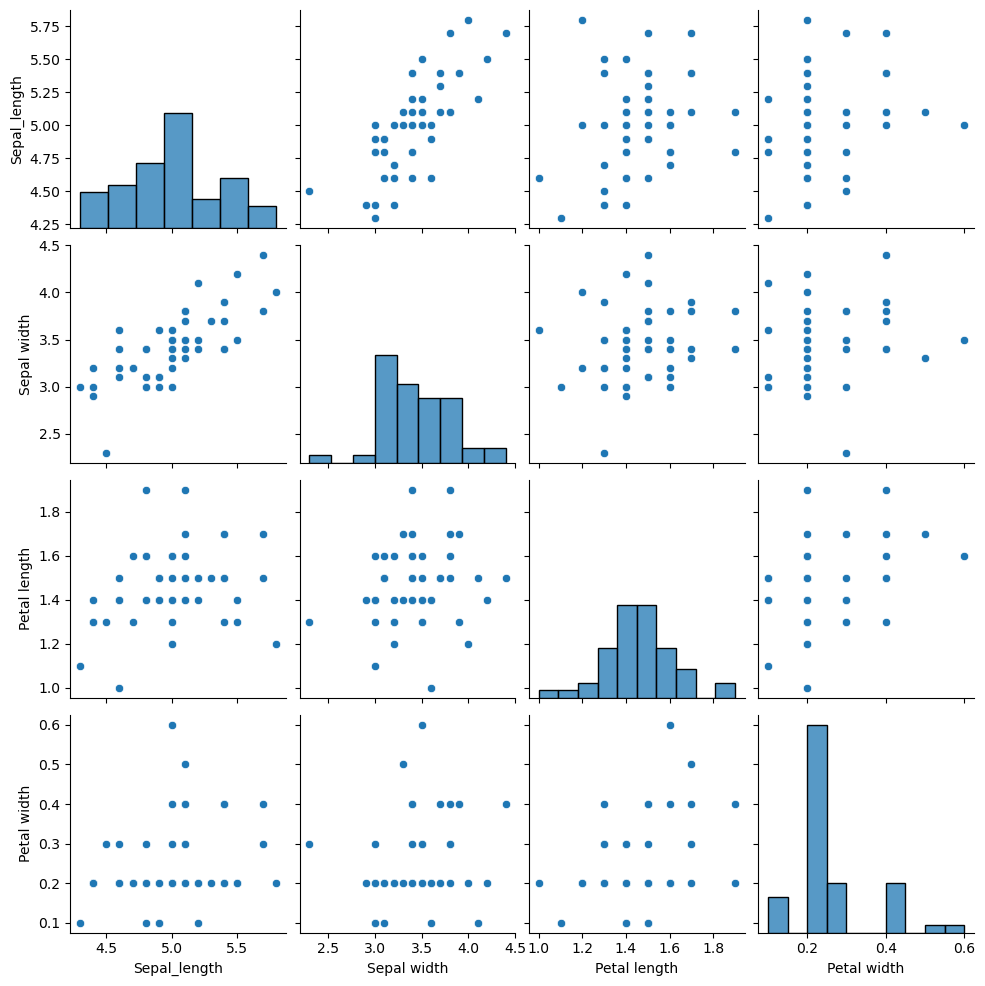

In [7]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal_length', 'Sepal width',
							 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

What measurements are related and which ones are not-related? Can you recognise the results you found, when you computed the variance and covariance?

PCA Analysis
We will do the principal component analysis (PCA) in two ways. First, a method combining several steps and finally using a dedicated pca library that does all at once.

Exercise 5
In the first approach, we do the analysis step-wise. Start by subtracting the mean from the data:

In [8]:
mn = np.mean(x, axis=0)
data = x - mn
data

array([[ 0.094,  0.072, -0.062, -0.046],
       [-0.106, -0.428, -0.062, -0.046],
       [-0.306, -0.228, -0.162, -0.046],
       [-0.406, -0.328,  0.038, -0.046],
       [-0.006,  0.172, -0.062, -0.046],
       [ 0.394,  0.472,  0.238,  0.154],
       [-0.406, -0.028, -0.062,  0.054],
       [-0.006, -0.028,  0.038, -0.046],
       [-0.606, -0.528, -0.062, -0.046],
       [-0.106, -0.328,  0.038, -0.146],
       [ 0.394,  0.272,  0.038, -0.046],
       [-0.206, -0.028,  0.138, -0.046],
       [-0.206, -0.428, -0.062, -0.146],
       [-0.706, -0.428, -0.362, -0.146],
       [ 0.794,  0.572, -0.262, -0.046],
       [ 0.694,  0.972,  0.038,  0.154],
       [ 0.394,  0.472, -0.162,  0.154],
       [ 0.094,  0.072, -0.062,  0.054],
       [ 0.694,  0.372,  0.238,  0.054],
       [ 0.094,  0.372,  0.038,  0.054],
       [ 0.394, -0.028,  0.238, -0.046],
       [ 0.094,  0.272,  0.038,  0.154],
       [-0.406,  0.172, -0.462, -0.046],
       [ 0.094, -0.128,  0.238,  0.254],
       [-0.206, 

In [9]:
N, D = data.shape
# Compute the covariance matrix using the given formula
cx = (1 / (N - 1)) * np.matmul(data.T, data)
print("Covariance matrix using the direct formula:")
print(cx)
# Compute the covariance matrix using np.cov
cx_cov = np.cov(data.T)


print("\nCovariance matrix using np.cov:")
print(cx_cov)

Covariance matrix using the direct formula:
[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]

Covariance matrix using np.cov:
[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]


This code uses np.cov() to compute the covariance matrix directly from the data. The parameter rowvar=False indicates that each column of the data matrix represents a variable, and the rows contain observations.

Exercise 6
Now you can compute the principal components using eigenvector analysis:

In [10]:
values, vectors = np.linalg.eig(cx) # Here c_x is your covariance matrix.
print(values)
print(vectors)

[0.23645569 0.03691873 0.0267964  0.00903326]
[[ 0.6690784   0.59788401  0.43996277 -0.03607712]
 [ 0.73414783 -0.62067342 -0.27460747 -0.01955027]
 [ 0.0965439   0.49005559 -0.8324495  -0.23990129]
 [ 0.06356359  0.13093791 -0.19506751  0.96992969]]


The values are the eigenvalues and the vectors are the eigenvectors (the principal components).

Exercise 7
Lets examine some properties of the principal components. First try to find out how much of the total variation the first component explains?

You can also plot the amount of explained variation for each component:

In [18]:
#First component explanation
first_component = values[0]/values.sum()*100

first_component

76.4723702306554

[76.47237023 11.93992401  8.66624997  2.92145579]


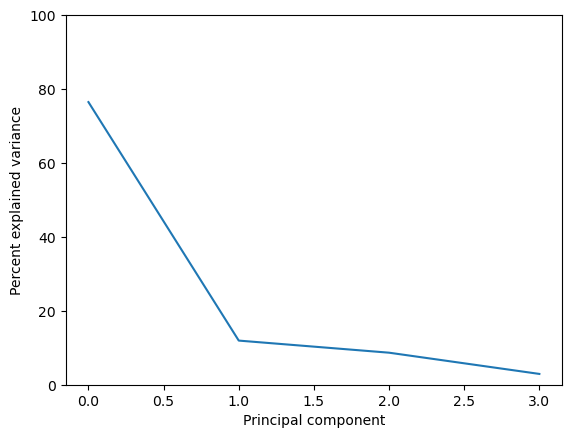

In [11]:
v_norm = values / values.sum() * 100
print(v_norm)
plt.plot(v_norm)
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])

plt.show()

Exercise 8
The data can be projected onto the PCA space by using the dot-product:

In [12]:
pc_proj = vectors.T.dot(data.T)
print(pc_proj.shape)

(4, 50)


Try to use seaborns pairplot with the projected data? How does the covariance structure look?

c:\Users\Leuro\anaconda3\envs\Image_Analysis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leuro\anaconda3\envs\Image_Analysis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leuro\anaconda3\envs\Image_Analysis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Leuro\anaconda3\envs\Image_Analysis\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

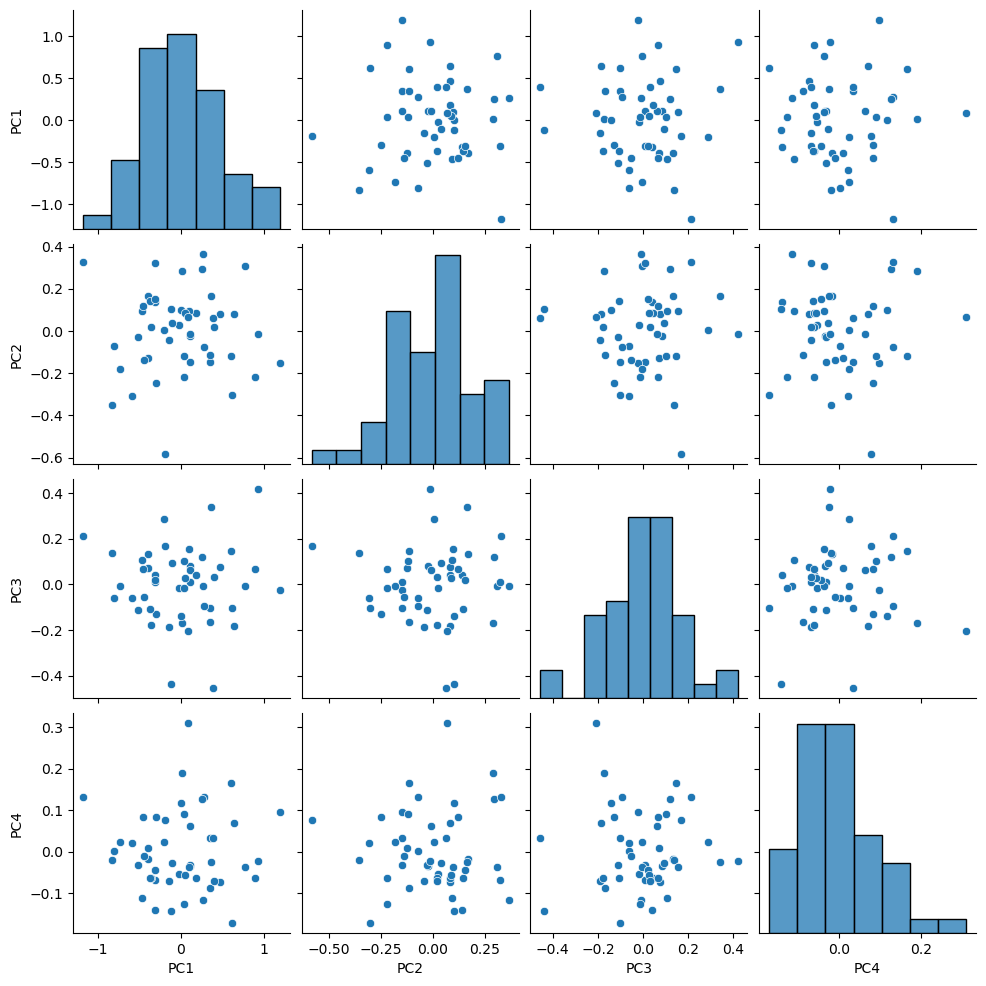

In [13]:
# Transpose the pc_proj array
pc_proj_transposed = pc_proj.T

# Create a DataFrame from the transposed data
df = pd.DataFrame(pc_proj_transposed, columns=[f'PC{i+1}' for i in range(pc_proj_transposed.shape[1])])

# Use seaborn's pairplot to visualize pairwise relationships and histograms
sns.pairplot(df)

By observing the scatterplots, you can assess the covariance structure of the projected data in the PCA space. Positive covariance between variables is indicated by a positively sloped relationship in the scatterplot, while negative covariance is indicated by a negatively sloped relationship.

### Direct PCA using the decompositions functions

The Python machine learning package sci-kit learn (*sklearn*) have several functions to do data decompositions, where PCA is one of them.

Let us explore if we get the same results using this function.  
Start by installing *sklearn* (see Appendix A) and importing the package:



In [14]:
from sklearn import decomposition

### Exercise 9

Read the data matrix as before, but do not subtract the mean. The procedure subtracts the mean for you.

The PCA can be computed using:

In [15]:
pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

print(values_pca)

print(exp_var_ratio)

print(vectors_pca)

data_transform = pca.transform(data)


[0.23645569 0.03691873 0.0267964  0.00903326]
[0.7647237  0.11939924 0.0866625  0.02921456]
[[ 0.6690784   0.73414783  0.0965439   0.06356359]
 [-0.59788401  0.62067342 -0.49005559 -0.13093791]
 [-0.43996277  0.27460747  0.8324495   0.19506751]
 [-0.03607712 -0.01955027 -0.23990129  0.96992969]]
